In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## Loading the dataset

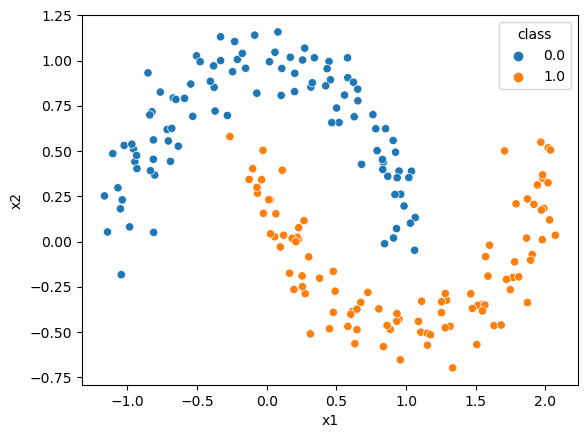

In [2]:
X, y = make_moons(n_samples=200, random_state=0, shuffle=True, noise=0.1)
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=["x1", "x2", "class"])
sns.scatterplot(data=df, x="x1", y="x2", hue="class");

## Define X, y values

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape)
print(y.shape)

(200, 2)
(200,)


## Splitting the dataset to Train and Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(160, 2) (40, 2)
(160,) (40,)


## Create the classifications models

In [5]:
svm_clf = SVC(C=100, kernel="linear")
svm_clf.fit(X_train, y_train)

SVC(C=100, kernel='linear')

## Evaluation


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        22
         1.0       0.84      0.89      0.86        18

    accuracy                           0.88        40
   macro avg       0.87      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



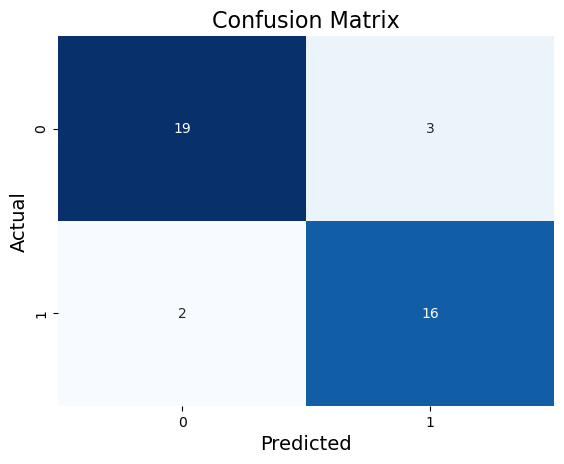

In [6]:
y_pred = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False, fmt="d")
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title("Confusion Matrix", fontsize=16);

## Visualising the Training/Testing set and  results

In [7]:
from matplotlib.colors import ListedColormap
cp = ListedColormap(['red', 'green'])
(X1, X2) = np.meshgrid(
    np.arange(start=X_train[:, 0].min() - 1, stop=X_train[:, 0].max() + 1, step=0.01),
    np.arange(start=X_train[:, 1].min() - 1, stop=X_train[:, 1].max() + 1, step=0.01),
)
mesh_pred = svm_clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)


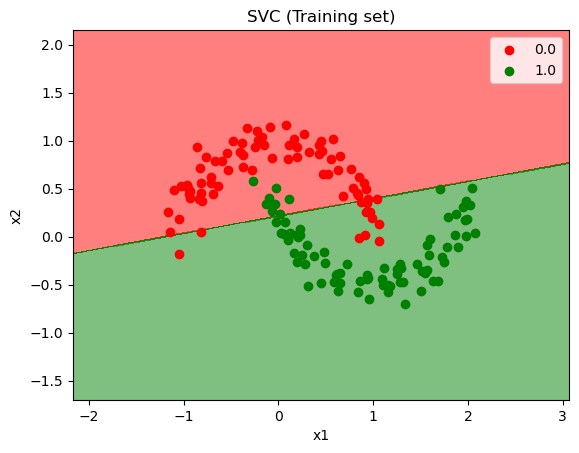

In [8]:
plt.contourf(X1, X2, mesh_pred, alpha=0.5, cmap=cp)
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], color=cp(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("SVC (Training set)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

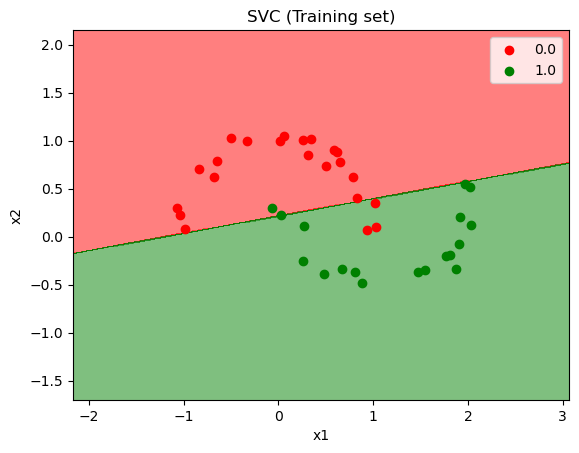

In [9]:
plt.contourf(X1, X2, mesh_pred, alpha=0.5, cmap=cp)

for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == j, 0], X_test[y_test == j, 1], color=cp(i), label=j)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("SVC (Training set)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()